In [0]:
!pip install -q keras

In [0]:
from keras.datasets import imdb

(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=10000)

In [5]:
print(train_label[0])
print(train_data[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
import numpy as np
def vectorize_sequences(sequence,dimension=10000):
    result = np.zeros((len(sequence),dimension))
    for i,j in enumerate(sequence):
        result[i,j] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')


In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))

model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [28]:
x_val=x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size =512,validation_data =(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.3037 - val_acc

Epoch 10/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0576 - acc: 0.9860 - val_loss: 0.4012 - val_acc: 0.8718
Epoch 11/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.0465 - acc: 0.9901 - val_loss: 0.3947 - val_acc: 0.8750
Epoch 12/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.0373 - acc: 0.9928 - val_loss: 0.4176 - val_acc: 0.8745
Epoch 13/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0311 - acc: 0.9944 - val_loss: 0.4966 - val_acc: 0.8690
Epoch 14/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.0245 - acc: 0.9953 - val_loss: 0.4864 - val_acc: 0.8737
Epoch 15/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0160 - acc: 0.9978 - val_loss: 0.5753 - val_acc: 0.8543
Epoch 16/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0161 - acc: 0.9980 - val_loss: 0.5391 - val_acc: 0.8695
Epoch 17/20
15000/15000 [=========

15000/15000 [==============================] - 1s 80us/step - loss: 0.0051 - acc: 0.9998 - val_loss: 0.6319 - val_acc: 0.8661
Epoch 20/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.0074 - acc: 0.9985 - val_loss: 0.6599 - val_acc: 0.8672


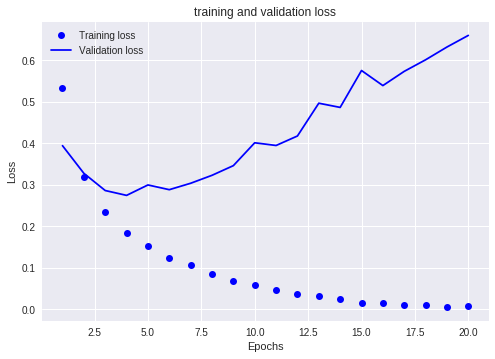

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

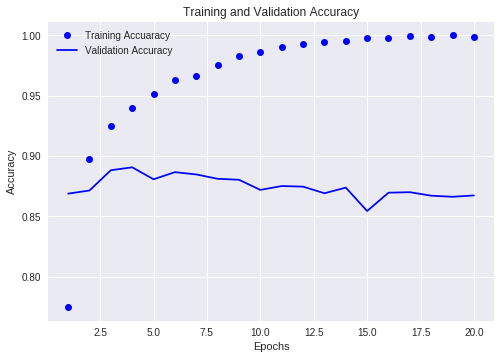

In [30]:
plt.clf()

acc_v = history_dict['acc']
val_acc_v=history_dict['val_acc']

plt.plot(epochs,acc_v,'bo',label='Training Accuaracy')
plt.plot(epochs,val_acc_v,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()


In [31]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
result = model.evaluate(x_test,y_test)

print(result)


Epoch 1/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.1987 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 3s 125us/step
[0.3238552635002136, 0.87308]
